## Forward model : Anechoic conditions

In [4]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt 
import wave 
from scipy.io import wavfile
import soundfile
import time 

In [5]:
# loading HRIR data for 6 microphones in the lego set 
# There are only 180 angles, so a 2 degree discretization.
# we will here implement the response for a randomly generated 
# white noise with one of the six mics
path = '../data/lego1_h_theta_time.npy' #  path to lego mics data 
path_ = '../data/kemar_h_theta_1deg_time.npy'
hrir_tot  = np.load(path) #head related transfer function

In [6]:
def forward_model(mic=0,theta=90,hrir_tot=0):
    
    hrir = np.zeros((160, 180))
    hrir = hrir_tot[:, :, mic]
    
    fs = 16000 #samples/second
    T_ =0.5 #length of signal in time domain 
    N = int(T_*fs) #number of samples of the signal 
    mean = 0
    std = 1 
    
    white_noise = np.random.normal(mean, std, size=N)
    num_samples = int(hrir.shape[0])
    
    #defining first output by convolution 
    conv_len = N + num_samples -1  #length of the convolution
    #zero padding 
    #for same result of circular and linear convolution
    pad1 = np.zeros(conv_len-num_samples+1)
    pad2 = np.zeros(conv_len-N+1)
    
    h=  np.hstack((hrir[:,theta],pad1))
    w= np.hstack((white_noise,pad2))
    
    y = np.zeros((conv_len,))
    y += np.convolve(white_noise, hrir[:,theta]) #convolution with desired tranfer function at fixed theta
    
    #defining second output by multiplying the fourier transforms
    WHITE = np.fft.rfft(w)
    #Hrir = np.fft.rfft(hrir[:, theta])
    Hrir = np.fft.rfft(h)
    Y = np.multiply(WHITE,  Hrir)
    y2 = np.fft.irfft(Y)
    #y = np.hstack((y,np.zeros(1)))
    y = np.hstack((y,y2[len(y2)-1]))


    
    return y,y2

In [9]:
y, y2 = forward_model(0,0,hrir_tot)
error = np.mean(y-y2)
print('mean error between the both models: ' + str(error))

mean error between the both models: 1.2476197407446018e-18


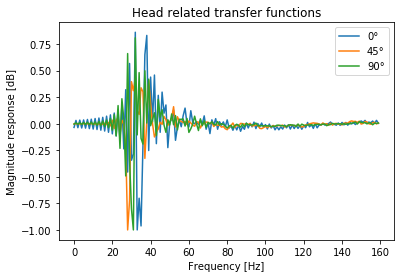

In [10]:
plt.plot(hrir_tot[:,0,1], label='0°')
plt.plot(hrir_tot[:,45,1], label='45°')
plt.plot(hrir_tot[:,90,1], label='90°')
plt.title('Head related transfer functions')
plt.show
plt.ylabel('Magnitude response [dB]')
plt.xlabel('Frequency [Hz]')
plt.legend()